# Agglomerative clustering on Vehical Dataset Data by `Mr. Harshit Dawar`!

## Importing the required Libraries!

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix

## Downloading the dataset!

In [3]:
!wget -O cars_clus.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cars_clus.csv

--2020-05-29 00:13:37--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cars_clus.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17774 (17K) [text/csv]
Saving to: ‘cars_clus.csv’

cars_clus.csv       100%[===================>]  17.36K  66.4KB/s    in 0.3s    

2020-05-29 00:13:39 (66.4 KB/s) - ‘cars_clus.csv’ saved [17774/17774]



## Importing the Dataset!

In [80]:
data = pd.read_csv("cars_clus.csv")

## Data PreProcessing!

In [81]:
data.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


In [82]:
data.shape

(159, 16)

In [83]:
# Almost all data is categorical here
data.dtypes

manufact      object
model         object
sales         object
resale        object
type          object
price         object
engine_s      object
horsepow      object
wheelbas      object
width         object
length        object
curb_wgt      object
fuel_cap      object
mpg           object
lnsales       object
partition    float64
dtype: object

In [84]:
# Checking the Null Data!
data.isna().sum()

manufact     2
model        0
sales        0
resale       0
type         0
price        0
engine_s     0
horsepow     0
wheelbas     0
width        0
length       0
curb_wgt     0
fuel_cap     0
mpg          0
lnsales      0
partition    0
dtype: int64

In [85]:
# Dropping the Duplicates
data.dropna(inplace=True)

In [86]:
data.shape

(157, 16)

In [87]:
data.columns

Index(['manufact', 'model', 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales', 'partition'],
      dtype='object')

In [88]:
data[[ 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']] = data[['sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']].apply(pd.to_numeric, errors = 'coerce')

In [89]:
data.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
2,Acura,CL,14.114,18.225,0.0,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,2.647,0.0
3,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0
4,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0


In [90]:
# Here null values appears because now every part is in integer and can be clearly identified as null,
# previously there were some other constants used, so identification was not possible.
data.isna().sum()

manufact      0
model         0
sales         0
resale       36
type          0
price         2
engine_s      1
horsepow      1
wheelbas      1
width         1
length        1
curb_wgt      2
fuel_cap      1
mpg           3
lnsales       0
partition     0
dtype: int64

In [91]:
data.dropna(inplace = True)

In [92]:
# All null values removed!
data.isna().sum().sum()

0

In [93]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [101]:
data.dtypes

manufact      object
model         object
sales        float64
resale       float64
type         float64
price        float64
engine_s     float64
horsepow     float64
wheelbas     float64
width        float64
length       float64
curb_wgt     float64
fuel_cap     float64
mpg          float64
lnsales      float64
partition    float64
dtype: object

In [156]:
# Selecting categorical variables
categorical_variables = ['manufact', 'model']

'''If I use here LabelEnocder here, then I cannot transform both the columns at once, so I have to either
use OneHotEncoder, or transform each and every column 1 by 1.
'''
# Initializing Encoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)  '''sparse = False is neccessary here, because 
without it, output will be in congested form
'''
 
# Initializing column transformer
transformer = ColumnTransformer(transformers=[
                                    ("encdoing", encoder, categorical_variables)],
                                 remainder="passthrough"
                                )


In [157]:
transformed_data = transformer.fit_transform(data)

In [158]:
transformed_data = pd.DataFrame(transformed_data)

In [159]:
transformed_data

,0,1,2,3,4,5,6,7,8,9,...,146,147,148,149,150,151,152,153,154,155
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,115.0,98.9,68.3,163.3,2.767,14.5,26.0,2.278,0.0
113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,115.0,98.9,68.3,172.3,2.853,14.5,26.0,4.427,0.0
114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.8,150.0,106.4,68.5,184.1,3.043,16.4,27.0,3.934,0.0
115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,115.0,97.4,66.7,160.4,3.079,13.7,26.0,2.259,0.0


In [160]:
# data["model"] = LabelEncoder().fit_transform(data["model"])

In [161]:
# Performing Transformation/Scaling of the data
from sklearn.preprocessing import MinMaxScaler

In [162]:
scaler = MinMaxScaler()

In [163]:
final_data = scaler.fit_transform(transformed_data)

In [165]:
final_data = pd.DataFrame(final_data)

In [166]:
final_data

,0,1,2,3,4,5,6,7,8,9,...,146,147,148,149,150,151,152,153,154,155
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.114286,0.215190,0.186551,0.281437,0.306258,0.231056,0.133641,0.433333,0.592353,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.314286,0.430380,0.336226,0.461078,0.579228,0.503727,0.317972,0.333333,0.691765,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.357143,0.392405,0.477223,0.526946,0.628495,0.607143,0.354839,0.233333,0.512588,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.114286,0.240506,0.216920,0.335329,0.380826,0.342547,0.281106,0.400000,0.614353,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.257143,0.367089,0.349241,0.808383,0.567244,0.517391,0.377880,0.233333,0.604706,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.142857,0.151899,0.136659,0.341317,0.185087,0.270807,0.193548,0.366667,0.527647,0.0
113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.142857,0.151899,0.136659,0.341317,0.304927,0.297516,0.193548,0.366667,0.780471,0.0
114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.114286,0.240506,0.299349,0.353293,0.462051,0.356522,0.281106,0.400000,0.722471,0.0
115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.142857,0.151899,0.104121,0.245509,0.146471,0.367702,0.156682,0.366667,0.525412,0.0


## Agglomerative Clustering using Scipy

In [167]:
distance = distance_matrix(final_data, final_data)

In [169]:
distance.shape

(117, 117)

In [170]:
agglomerative_clustering = AgglomerativeClustering(n_clusters=5, linkage="complete")

In [171]:
agglomerative_clustering.fit(final_data)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=5)

In [172]:
agglomerative_clustering.labels_

array([0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 4, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 3, 3,
       3, 3, 3, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 1, 1, 1, 1, 1])

In [173]:
data["cluster"] = agglomerative_clustering.labels_

In [174]:
data.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster
0,Acura,62,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,0
1,Acura,107,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,0
3,Acura,88,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,0
4,Audi,4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,2
5,Audi,5,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0,2


In [179]:
graph = hierarchy.linkage(y = distance, method = "complete")

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


In [181]:
graph.shape

(116, 4)

## Data Visualization

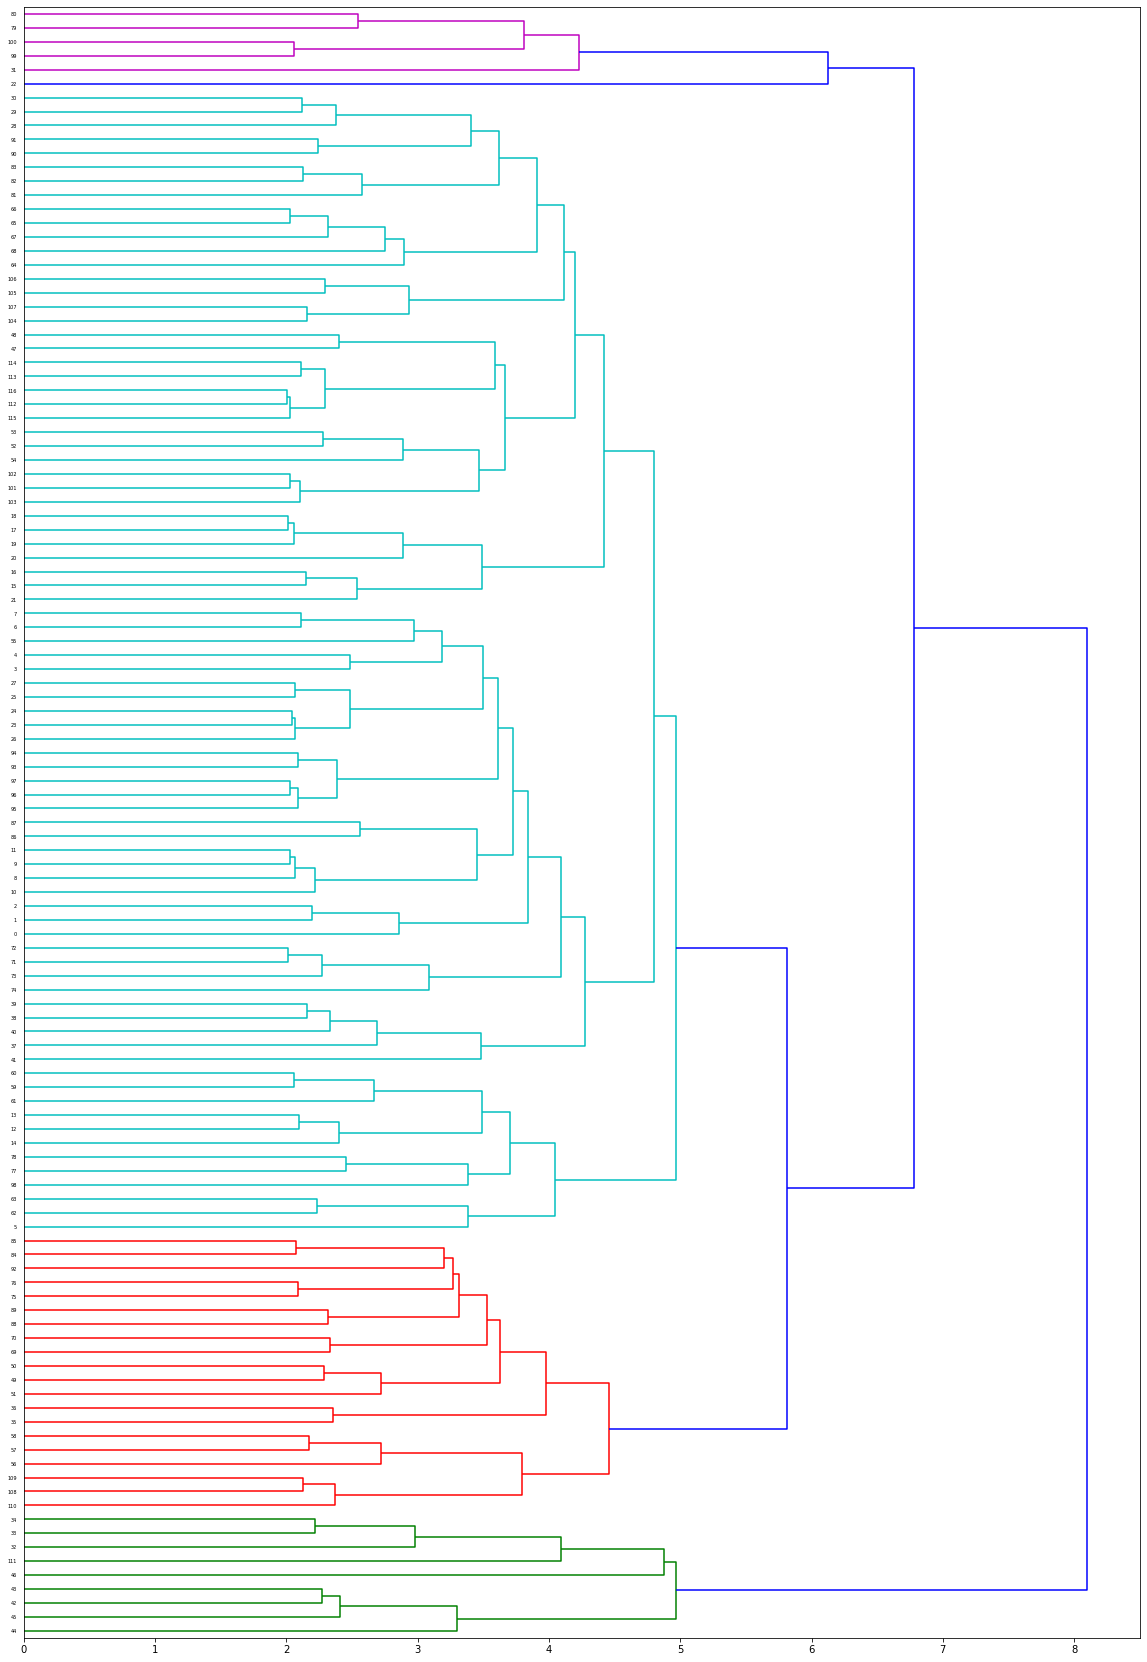

In [188]:
# Figure will have 5 different clusters, because we have used 5 different clusters.
plt.figure(figsize=(20, 30))
dendro = hierarchy.dendrogram(graph, orientation="right")

In [191]:
dendro.keys()

dict_keys(['icoord', 'dcoord', 'ivl', 'leaves', 'color_list'])

In [177]:
data.groupby(["cluster", "type"])["cluster"].size().unstack()

type,0.0,1.0
cluster,,
0,42.0,15.0
1,27.0,3.0
2,18.0,NaN
3,NaN,11.0
4,1.0,NaN


In [194]:
temp = data.groupby(["cluster"])["cluster"].count()

In [195]:
type(temp)

pandas.core.series.Series

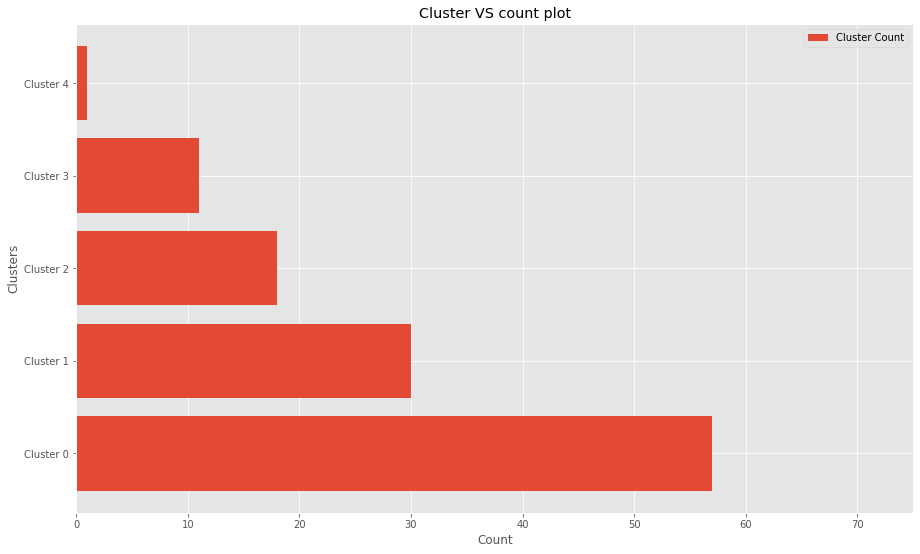

In [211]:
plt.style.use("ggplot")
plt.figure(figsize=(15,9))
plt.barh([0,1,2,3,4], temp.values, label = "Cluster Count" )
plt.ylabel("Clusters")
plt.xlabel("Count")
plt.title("Cluster VS count plot")
plt.xlim(0, 75)
plt.yticks([0, 1, 2, 3, 4], ["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4"])
plt.legend()
plt.show()

## Thank you so much for investing your time in my work. Happy Coding & Learning!
## Love & Regards
## Harshit Dawar